In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from scipy.optimize import fmin_tnc

# Loading data

In [4]:
df = pd.read_csv('ex2data1.txt', names=['x1', 'x2', 'y'], header=None)
df.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
X = df[['x1','x2']]
y = df['y']

In [31]:
df1 = df.copy()
X = np.column_stack((np.ones(X.shape[0]), X))
# Equivalent:
# X = np.vstack((np.ones(X.shape[0]), X)).T

In [176]:
theta = np.zeros(X.shape[1])

# Plotting data

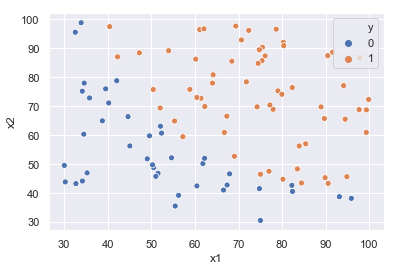

In [185]:
sns.scatterplot(x="x1", y="x2", hue="y", data=df);

# Cost and gradient descent

## Sigmoid

In [37]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-1 * z))
    return res

## Cost function

In [146]:
def compute_cost(theta, X, y):
    m = X.shape[0]
    h = sigmoid(np.sum(X*theta))
    J = (-1/m)*np.sum(y*np.log(h) - (1 - y)*np.log(1 - h))
    grad = (1/m)*np.sum(X @ (h - y))
    return J, grad

In [147]:
%%time
compute_cost(theta, X, y)

CPU times: user 995 µs, sys: 56 µs, total: 1.05 ms
Wall time: 1 ms


(0.13862943611198905, -23.372058794804744)

In [148]:
def compute_cost_vectorized(theta, X, y):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    J = (1 / m)*(-1 * np.dot(y, np.log(h)) - np.dot((1 - y), np.log(1 - h)))
    grad = (1 / m) * np.dot(X, (h - y))
    return J, grad

In [149]:
%%time
compute_cost_vectorized(theta, X, y)

CPU times: user 545 µs, sys: 63 µs, total: 608 µs
Wall time: 552 µs


(0.6931471805599452, array([ -0.1       , -12.00921659, -11.26284221]))

## Optimizing using scipy fmin_tnc

In [159]:
# it works because cost function has theta as first argument
optimize = fmin_tnc(compute_cost_vectorized, x0=theta, args=(X, y))

In [160]:
# fprintf('Expected theta (approx):\n');
# fprintf(' -25.161\n 0.206\n 0.201\n');
theta_result = optimize[0]
theta_result

array([-25.16131869,   0.20623159,   0.20147149])

In [161]:
# fprintf('Expected cost (approx): 0.203\n');
compute_cost_vectorized(theta_result, X, y)

(0.20349770158947433, array([9.07652441e-09, 9.36760996e-08, 4.82243362e-07]))

In [ ]:
#TODO plots

## Predict and accuracies

In [178]:
def predict(theta, X):
    pred = sigmoid(X @ theta) >= 0.5
    return [int(p) for p in pred]

In [180]:
p = predict(theta_result, X)
accuracy = np.mean([int(i == j) for i,j in zip(p, y)])
accuracy

0.89

# Regularized logistic regression

In [202]:
df2 = pd.read_csv('ex2data2.txt', names=['x1', 'x2', 'y'], header=None)
X = df2[['x1','x2']]
y = df2['y']
X = np.column_stack((np.ones(X.shape[0]), X))
lmbd=1

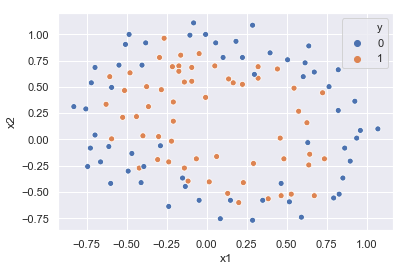

In [203]:
sns.scatterplot(x="x1", y="x2", hue="y", data=df2);

In [220]:
def compute_cost_regularized(theta, X, y, lmbd):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    theta_excl_zero = np.array([0, *theta[1:]])
    J = (1 / m)*(-1 * np.dot(y, np.log(h)) - np.dot((1 - y), np.log(1 - h))) \
            + (lmbd / (2*m)) * np.sum(theta_excl_zero*theta_excl_zero)
    grad = (1 / m) * np.dot((h - y), X) \
            + np.sum((lmbd/m)*theta_excl_zero)
    return J, grad

In [221]:
# fprintf('Cost at initial theta (zeros): %f\n', cost);
# fprintf('Expected cost (approx): 0.693\n');
# fprintf('Expected gradients (approx) - first five values only:\n');
# fprintf(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');
compute_cost_regularized(theta, X, y, lmbd)

(0.6931471805599453, array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05]))